<a href="https://colab.research.google.com/github/pierreduke/Rice_Leaf_Disease-DIP-ET4591-20202/blob/main/trainDenseNet121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# !unzip /content/drive/MyDrive/Rot_Img.zip

Archive:  /content/drive/MyDrive/Rot_Img.zip
   creating: Rot_Img/
   creating: Rot_Img/test/
   creating: Rot_Img/test/Bacterial leaf blight/
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial115.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial116.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial117.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial118.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial119.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial120.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial24.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial25.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial26.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial27.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial56.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial57.jpg  
  inflating: Rot_Img/test/Bacterial leaf blight/Bacterial58

In [4]:
#Khai bao thu vien
from sklearn.preprocessing import LabelEncoder
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.layers.core import Dropout
from imutils import paths
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Flatten
from google.colab.patches import cv2_imshow
from keras.models import load_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

In [5]:
#Model_DenseNet121
from tensorflow.keras.applications import DenseNet121
baseModel = DenseNet121(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2,2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1024, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(3, activation="softmax")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)
print(model.summary())

29089792/29084464 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 64, 64, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 70, 70, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
_____________________________

In [ ]:
#Model VGG16
# from tensorflow.keras.applications import VGG16
# baseModel = VGG16(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

In [ ]:
# #Model MobileNet
# from tensorflow.keras.applications import MobileNet
# baseModel = MobileNet(weights="imagenet", include_top=False, input_tensor=Input(shape=(64, 64, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(2,2))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

In [ ]:
# #Model Inception
# from tensorflow.keras.applications import InceptionV3
# baseModel = InceptionV3(weights="imagenet", include_top=False, input_tensor=Input(shape=(76, 76, 3)))
# headModel = baseModel.output
# headModel = AveragePooling2D(pool_size=(1,1))(headModel)
# headModel = Flatten(name="flatten")(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(1024, activation="relu")(headModel)
# headModel = Dropout(0.5)(headModel)
# headModel = Dense(3, activation="softmax")(headModel)
# model = Model(inputs=baseModel.input, outputs=headModel)
# print(model.summary())

In [6]:
#thiet lap thong so lr, batch_size va epochs
INIT_LR = 1e-4
BS = 8
EPOCHS = 20

In [7]:
#khoi tao input
imagePaths = list(paths.list_images('/content/Rot_Img/train'))
data = []
labels = []

for imagePath in imagePaths:
    label = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    image = cv2.resize(image, (64, 64))
    # cv2_imshow(image)
    data.append(image)
    labels.append(label)
data = np.array(data, dtype="float") / 255.0

In [8]:
#one-hot label
le = LabelEncoder()
labels = le.fit_transform(labels)
labels = np_utils.to_categorical(labels, 3)

In [9]:
#set du lieu train
(X_train, X_val, y_train, y_val) = train_test_split(data, labels, test_size=150/950, random_state=42)

In [10]:
#compile + train
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
H = model.fit(X_train, y_train, validation_data=(X_val, y_val), batch_size=BS, steps_per_epoch=len(X_train) // BS, epochs=EPOCHS)

Epoch 1/20
300/300 [==============================] - 72s 98ms/step - loss: 0.7227 - accuracy: 0.6867 - val_loss: 0.7150 - val_accuracy: 0.7067
Epoch 2/20
300/300 [==============================] - 26s 87ms/step - loss: 0.4386 - accuracy: 0.8308 - val_loss: 0.2537 - val_accuracy: 0.9044
Epoch 3/20
300/300 [==============================] - 26s 87ms/step - loss: 0.3334 - accuracy: 0.8712 - val_loss: 0.1734 - val_accuracy: 0.9400
Epoch 4/20
300/300 [==============================] - 26s 87ms/step - loss: 0.2329 - accuracy: 0.9171 - val_loss: 0.1336 - val_accuracy: 0.9533
Epoch 5/20
300/300 [==============================] - 27s 91ms/step - loss: 0.1834 - accuracy: 0.9367 - val_loss: 0.1389 - val_accuracy: 0.9356
Epoch 6/20
300/300 [==============================] - 26s 87ms/step - loss: 0.1590 - accuracy: 0.9408 - val_loss: 0.1268 - val_accuracy: 0.9489
Epoch 7/20
300/300 [==============================] - 27s 90ms/step - loss: 0.1472 - accuracy: 0.9504 - val_loss: 0.0949 - val_accuracy:

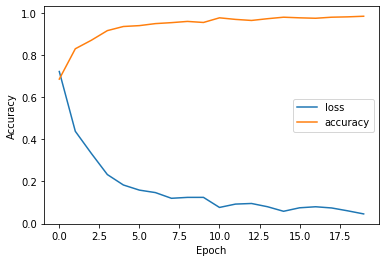

In [11]:
#do thi train
import matplotlib.pyplot as plt

plt.plot(np.arange(0, EPOCHS), H.history['loss'], label='loss')
plt.plot(np.arange(0, EPOCHS), H.history['accuracy'], label = 'accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend()
plt.show()

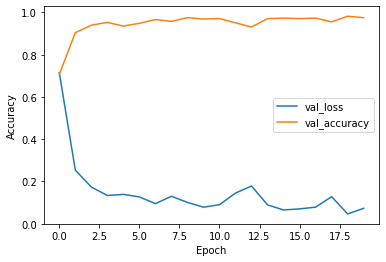

In [12]:
#do thi train
import matplotlib.pyplot as plt

plt.plot(np.arange(0, EPOCHS), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0, EPOCHS), H.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# plt.ylim([0, 1])
plt.legend()
plt.show()

In [13]:
#save model
model.save('XLAS_DenseNet121.h5')

**NGẮT**

---



---



In [ ]:
from keras.models import load_model

# model1 = load_model('/content/drive/MyDrive/ImgProc/XLA_DenseNet121.h5')

In [16]:
score = model.evaluate(X_train, y_train)
print('Score train = ', score)

75/75 [==============================] - 3s 42ms/step - loss: 0.0125 - accuracy: 0.9967
Score train =  [0.01249770913273096, 0.996666669845581]


In [15]:
score = model.evaluate(X_val, y_val)
print('Score train = ', score)

15/15 [==============================] - 1s 56ms/step - loss: 0.0728 - accuracy: 0.9756
Score train =  [0.07276348024606705, 0.9755555391311646]


**6) Bảng thống kê các giá trị phân loại**


> Accuracy = (TP+TN)/(TP+FP+FN+TN)

> Precision = TP/(TP+FP)

> Recall = TP/(TP+FN)

> F1 Score = 2(Recall * Precision) / (Recall + Precision)

















In [17]:
y_pred_train = model.predict(X_train)
from sklearn.metrics import classification_report
print(classification_report(y_train.argmax(axis=1), y_pred_train.argmax(axis=1), target_names=le.classes_, digits = 6))
y_pred_val = model.predict(X_val)
from sklearn.metrics import classification_report
print(classification_report(y_val.argmax(axis=1), y_pred_val.argmax(axis=1), target_names=le.classes_, digits = 6))

                       precision    recall  f1-score   support

Bacterial leaf blight   0.994994  0.998744  0.996865       796
           Brown spot   1.000000  0.991379  0.995671       812
            Leaf smut   0.994975  1.000000  0.997481       792

             accuracy                       0.996667      2400
            macro avg   0.996656  0.996708  0.996672      2400
         weighted avg   0.996681  0.996667  0.996664      2400

                       precision    recall  f1-score   support

Bacterial leaf blight   0.993333  0.967532  0.980263       154
           Brown spot   0.985294  0.971014  0.978102       138
            Leaf smut   0.951220  0.987342  0.968944       158

             accuracy                       0.975556       450
            macro avg   0.976616  0.975296  0.975770       450
         weighted avg   0.976081  0.975556  0.975626       450



In [18]:
print("So sanh train")
trainY = np.argmax(y_train, axis=1).ravel()
predtrainY = np.argmax(y_pred_train, axis=1).ravel()
# print(np.argmax(y_test, axis = 1))
print(trainY)
print(predtrainY)

So sanh train
[0 0 2 ... 2 2 0]
[0 0 2 ... 2 2 0]


In [19]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(trainY, predtrainY)
print(cnf_matrix)

[[795   0   1]
 [  4 805   3]
 [  0   0 792]]


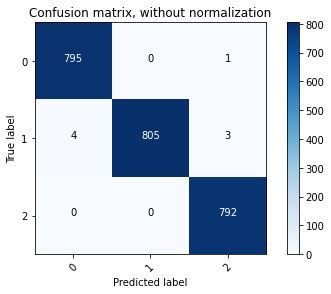

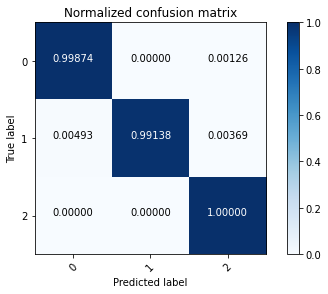

In [20]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims = True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.5f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
class_names = [0, 1, 2]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()